Data Fields

- split: Train, Test split
- message: English text of actual messages related to disaster
- original: Text of column 3 in native language as originally written
- genre: Type of message, including direct messages, social posting, and news stories or bulletins
- related: Is the message disaster related? 1= yes, 0=no, 2=maybe
- PII: Does the message contain PII? 1= yes, 0=no
- request: Does the message contain a request? 1= yes, 0=no
- offer: Does the message contain an offer? 1= yes, 0=no
- aid_related: Is the message aid related? 1= yes, 0=no
- medical_help: Does the message concern medical help? 1= yes, 0=no
- medical_products: Does the message concern medical products? 1= yes, 0=no
- search_and_rescue: Does the message concern search and rescue? 1= yes, 0=no
- security: Does the message concern security? 1= yes, 0=no
- military: Does the message concern military? 1= yes, 0=no
- child_alone: Does the message mention a child alone? 1= yes, 0=no
- water: Does the message concern water? 1= yes, 0=no
- food: Does the message concern food? 1= yes, 0=no
- shelter: Does the message concern shelter? 1= yes, 0=no
- clothing: Does the message concern clothing? 1= yes, 0=no
- money: Does the message concern money? 1= yes, 0=no
- missing_people: Does the message indicate missing people? 1= yes, 0=no
- refugees: Does the message concern refugess? 1= yes, 0=no
- death: Does the message imply death? 1= yes, 0=no
- other_aid: Is there any other aid needed? 1=yes, 0=no
- infrastructure_related: Does the message concern infrastructure? 1= yes, 0=no
- transport: Does the message concern transport? 1= yes, 0=no
- buildings: Does the message concern buildings? 1= yes, 0=no
- electricity: Does the message concern electricity? 1= yes, 0=no
- tools: Does the message concern tools? 1= yes, 0=no
- hospitals: Does the message concern clothing? 1= yes, 0=no
- shops: Does the message concern clothing? 1= yes, 0=no
- aid_centers:Does the message concern clothing? 1= yes, 0=no
- other_infrastructure:Does the message concern clothing? 1= yes, 0=no
- weather_related: Does the message concern weather? 1= yes, 0=no
- floods: Does the message indicate there was a flood? 1= yes, 0=no
- storm: Does the message indicate there was a storm? 1= yes, 0=no
- fire: Does the message indicate there was a fire? 1= yes, 0=no
- earthquake: Does the message indicate there was an earthquake? 1= yes, 0=no
- cold: Does the message indicate there was a cold? 1= yes, 0=no
- other_weather: Does the message indicate there was other weather issues? 1= yes, 0=no
- direct_report: Does the show a direct report? 1= yes, 0=no

***I. IMPORT DATA AND PREPARATION***

In [1452]:
import pandas as pd

In [1453]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [1454]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1455]:
import re

In [1456]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [1457]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1458]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1459]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [1460]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1461]:
df=pd.read_csv("Medical_Severity_Dataset_2.csv")

In [1462]:
# # Split the data into training, validation, and test sets with a 60:20:20 ratio
# # First split the data into a 80:20 ratio for the test set
# df_train_test, df_test = train_test_split(df, test_size=0.2, random_state=42)

# # Then split the training and validation sets with a 50:50 ratio
# # This will result in a 60% training set and a 20% validation set
# df_train, df_valid = train_test_split(df_train_test, test_size=0.2, random_state=42)

In [1463]:
# Split the data into training, validation, and test sets with a 80:10:10 ratio
# First split the data into a 90:10 ratio for the test set
df_train_test, df_test = train_test_split(df, test_size=0.1, random_state=42)

# Then split the training and validation sets with a 50:50 ratio
# This will result in a 80% training set and a 10% validation set
df_train, df_valid = train_test_split(df_train_test, test_size=0.1, random_state=42)


In [1464]:
df_train.head()

,ID,Type,Message,Medical_severity
58,2109,test,I am a child. My leg is broken. Please send me...,1
1087,16128,validation,** The UK's rescue and relief efforts in Nepal...,0
1822,23739,test,The health situation is described as worrying ...,1
1019,14069,test,"Appeal-I need shelter homes, food, warm clothe...",1
1083,16070,train,To keep the family from the freezing cold of t...,0


In [1465]:
df_test.head()

,ID,Type,Message,Medical_severity
582,26621,train,The best outcome would have been to give the S...,0
1711,22692,train,Some have said governments have over-reacted t...,0
1052,15388,validation,Remember when your phone needed to be charged ...,0
1075,15999,test,The X-rays shown by doctors at the rehab centr...,1
917,29610,train,"High risk groups are pregnant women, children ...",1


In [1466]:
df_valid.head()

,ID,Type,Message,Medical_severity
1617,21774,train,While relief efforts continue to assist avalan...,1
1368,19150,train,Exposure to elevated concentrations of ozone i...,0
1279,18265,train,The outbreak of the highly contagious disease ...,0
1063,15689,test,Winter storm Athena. Sounds tempting,1
1332,18764,train,"But he said ""overcrowded and desperate, it is ...",0


In [1467]:
df_train=df_train.applymap(str)
df_valid=df_valid.applymap(str)
df_valid=df_valid.applymap(str)

In [1468]:
def join_words(words_list):
    return ' '.join(words_list)

In [1469]:
#Set up stop words for removal
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1470]:
list_of_stop_words=["the", "has", "it", "with", "were", "can", "of","to","on", "this", "about", "that","was", "also", "http", "are","is", "am","some", "about","a", "an", "which", "what", "how", "when", "who","this","that","are", "the", "to", "we", "have", "in", "you", "with", "of", "what", "be", "as", "has", "from", "by", "that", "am","people","know","dont","also","would","people","please","like","would","People","Know","need","Need","Also","Like","Would","Dont","take","make","tell","well","many","Many","want","Want","cause","still","since","give","year","include","problem","place","region","number","find","provide","come","can","could","may","might","area","affect","world","person","part","thank","thanks","haiti", "information", "good", "anything", "nothing", "time","help","country","report","can","cant","cannot","can not","along","didnt","never","anymore",'havent',"without","others","natural","response","disaster","sandy","food","continue","something","even","already","continue",'disaster',"much","last","year","month","week","already", "important", "concern", "morning", "haitian", "system", "leave", "friend", "mother", "back","lose","portauprince","assisstance","relief","risk","management","support","stay","livelihood","temporary","support","send","someone","somebody","portauprince","flood","water","hurricane","earthquake","storm","bitly","rain","never","anymore","without","sandy","food","response","something","even","didnt","much","especially","last","week","year","month","sent","send","receive","daily","inside","concern","already","temporary","government","message",'nothern','central','local','start','severly','bring','india','district','province','flooding','official','santiago',"will","help","need","cross","people","thank","still","said","last","help","people","u","will","information","several","anything","find","thank","want","area","said","including","assisstance","need","team","work","live","lives","note","notes",'from','to','as','of','are','such','and','from','to','are','with','include','including','among','general','though','as','of','which','are','or','with','though','namely','also','a','an','against','food','water','people','will','people','will','need','many','area','said','u','current','situation','operation',"hello",'really','trouble','bother','worry','info','please','we','case','fell','able']
list_of_stop_words = list(set(list_of_stop_words))
stop_words.extend(list_of_stop_words)

In [1471]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = re.sub(r'\b\w{1,3}\b',' ',x)
    x = re.sub(r'\d+',' ', x)
    stop_words = list(stopwords.words('english'))
    stop_words.extend(list_of_stop_words)
    x = [w for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [1472]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [1473]:
#lemmatizing 
import string

def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)

In [1474]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)
df_valid=df_valid.applymap(str)

In [1475]:
df_train['message_cleaned']=df_train['Message'].apply(clean_text)
df_test['message_cleaned']=df_test['Message'].apply(clean_text)
df_valid['message_cleaned']=df_valid['Message'].apply(clean_text)

df_train['message_cleaned']=df_train['message_cleaned'].apply(preprocess)
df_test['message_cleaned']=df_test['message_cleaned'].apply(preprocess)
df_valid['message_cleaned']=df_valid['message_cleaned'].apply(preprocess)

II. FEATURE EXTRACTION

2.1 BAG-OR-WORDS

In [1538]:
# Create a CountVectorizer object and fit it on the "message" column of the train dataframe
vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(df_train['message_cleaned'])

# Create a CountVectorizer object and fit it on the "message" column of the test dataframe
test_bow = vectorizer.fit_transform(df_test['message_cleaned'])

# Create a CountVectorizer object and fit it on the "message" column of the valid dataframe
valid_bow = vectorizer.fit_transform(df_valid['message_cleaned'])


In [1539]:
# Create a dictionary of word frequencies from the BoW matrix for train
bow_dict_train = dict(zip(vectorizer.get_feature_names_out(), train_bow.sum(axis=0).tolist()[0]))
# Create a dictionary of word frequencies from the BoW matrix for test
bow_dict_test = dict(zip(vectorizer.get_feature_names_out(), test_bow.sum(axis=0).tolist()[0]))

# Create a dictionary of word frequencies from the BoW matrix for valid
bow_dict_valid = dict(zip(vectorizer.get_feature_names_out(), valid_bow.sum(axis=0).tolist()[0]))


2.2 Word Cloud

In [1540]:
# Import wordcloud
from wordcloud import WordCloud

In [1541]:
import matplotlib.pyplot as plt

In [1542]:
# Create a word cloud
wordcloud_train = WordCloud(background_color="white").generate_from_frequencies(bow_dict_train)
wordcloud_test = WordCloud(background_color="white").generate_from_frequencies(bow_dict_test)
wordcloud_valid = WordCloud(background_color="white").generate_from_frequencies(bow_dict_valid)

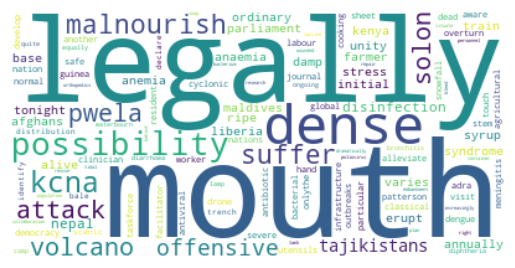

None

In [1543]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

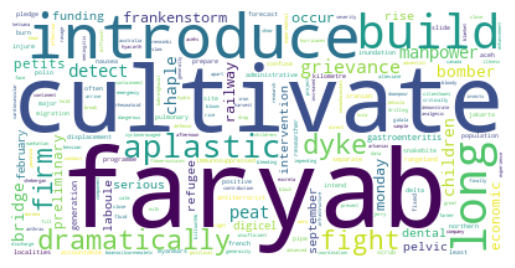

In [1544]:
# Test word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

2.3 TF-IDF

In [1545]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df = TfidfVectorizer(max_features=30)
tfidf_df_test_matrix = tfidf_df.fit_transform(df_test['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_test_matrix=pd.DataFrame(tfidf_df_test_matrix.toarray(), columns=tfidf_df.get_feature_names_out())
tfidf_df_test_matrix.fillna(value="", inplace=True)

In [1546]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe

tfidf_df_train_matrix = tfidf_df.fit_transform(df_train['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_train_matrix=pd.DataFrame(tfidf_df_train_matrix.toarray(), columns=tfidf_df.get_feature_names_out())
tfidf_df_train_matrix.fillna(value="", inplace=True)

In [1547]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe

tfidf_df_valid_matrix = tfidf_df.fit_transform(df_valid['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_valid_matrix=pd.DataFrame(tfidf_df_valid_matrix.toarray(), columns=tfidf_df.get_feature_names_out())
tfidf_df_valid_matrix.fillna(value="", inplace=True)

In [1548]:
tfidf_df_train_matrix.head()

,assistance,camp,care,child,community,disease,ebola,emergency,family,fever,...,medicine,million,outbreak,patient,shelter,supply,tent,treat,treatment,village
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.348039,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.632244,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.564532,0.000000,0.566307,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698155,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.715947


In [1549]:
tfidf_df_valid_matrix.head()

,acute,arrive,care,child,condition,damage,death,disease,ebola,emergency,...,outbreak,respiratory,road,severe,shelter,supply,tent,treatment,vaccine,victim
0,0.0,0.0,0.481922,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.47338,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.609846,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.601477,0.0,0.0,...,0.79889,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [1550]:
tfidf_df_test_matrix.head()

,assistance,care,centre,child,community,condition,disease,effort,emergency,facility,...,patient,prevent,rescue,service,shelter,spread,supply,tent,tsunami,village
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.635483,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.479931,0.0,0.527202,0.0,0.0,0.000000,0.0,...,0.501406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1551]:
feature__names=list(tfidf_df.get_feature_names_out())

In [1552]:
# Extract the top N keywords for each document
N = 3
top_keywords_per_doc_train = []
for row in tfidf_df_train_matrix:
    doc_keywords_train = sorted(list(zip(tfidf_df.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
    top_keywords_per_doc_train.append([k for k, v in doc_keywords_train])

# Print the keywords for each document
for i, keywords in enumerate(top_keywords_per_doc_train):
    print("Document {}: {}".format(i+1, ", ".join(keywords)))


Document 1: damage, arrive, care
Document 2: child, care, acute
Document 3: care, child, acute
Document 4: child, care, arrive
Document 5: ebola, condition, disease
Document 6: care, damage, arrive
Document 7: care, child, acute
Document 8: ebola, child, death
Document 9: damage, care, condition
Document 10: care, condition, acute
Document 11: condition, child, acute
Document 12: condition, child, acute
Document 13: arrive, acute, child
Document 14: arrive, care, acute
Document 15: damage, care, child
Document 16: damage, disease, arrive
Document 17: care, disease, condition
Document 18: care, child, acute
Document 19: condition, acute, care
Document 20: acute, death, child
Document 21: death, acute, child
Document 22: damage, death, acute
Document 23: arrive, care, condition
Document 24: care, death, acute
Document 25: condition, acute, death
Document 26: damage, arrive, acute
Document 27: acute, child, care
Document 28: acute, condition, arrive
Document 29: acute, condition, ebola
Do

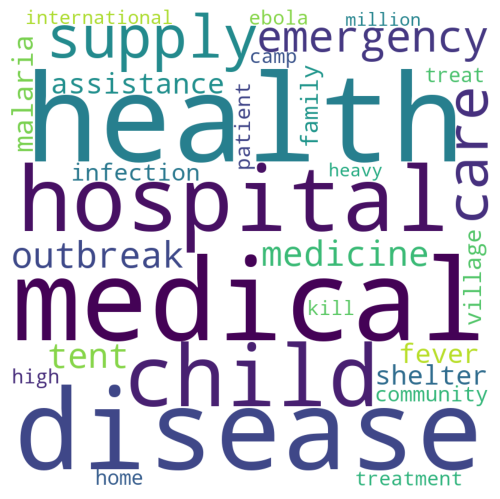

In [1553]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_train_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

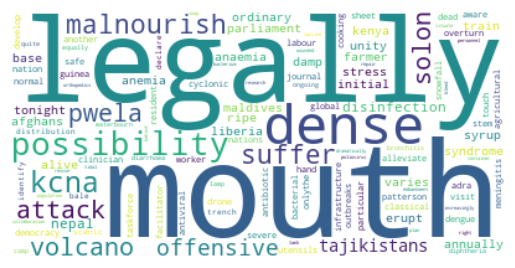

None

In [1554]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

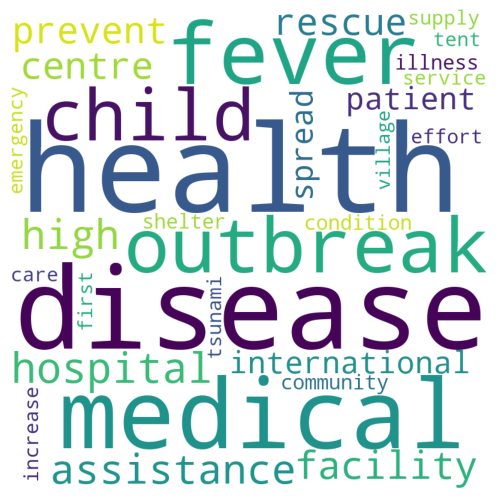

In [1555]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_test_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

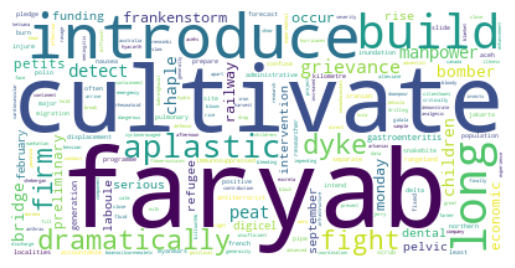

None

In [1556]:
# Train word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
display(plt.show())

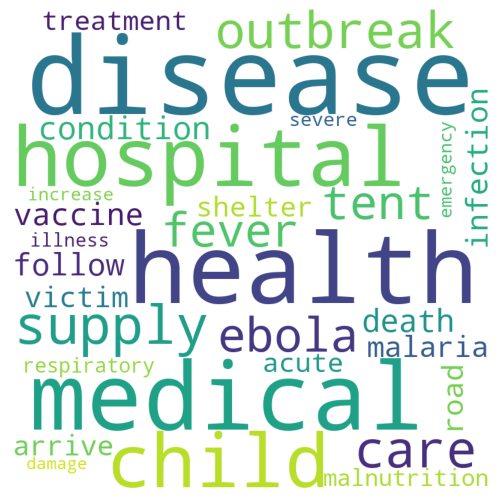

In [1557]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_valid_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

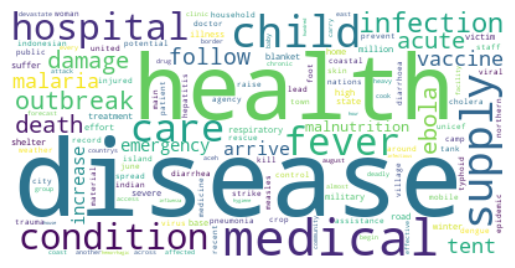

None

In [1558]:
# Train word_cloud
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.axis("off")
display(plt.show())

***III. Machine learning***

***1. Prepare data***

In [1559]:
import sklearn
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create an empty array
X = np.array([], dtype=str) 
# Append text from all the splits to the empty array
X = np.append(X, df_train["message_cleaned"]) 
X = np.append(X, df_valid["message_cleaned"])
X = np.append(X, df_test["message_cleaned"])

vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
vectorizer = vectorizer.fit(X) # Fit the vectorizer on the entire data

In [1560]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 8132


In [1561]:

# Append text from all the splits to the empty array
X_train = vectorizer.transform(df_train["message_cleaned"]).toarray()
X_test = vectorizer.transform(df_test["message_cleaned"]).toarray()
X_valid = vectorizer.transform(df_valid["message_cleaned"]).toarray()

In [1562]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 8132


In [1563]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
child => 1177
broken => 886
rescue => 6030
effort => 2216
nepal => 4817


In [1564]:
# Transform the text for each data split and store it in a variable
X_train = vectorizer.transform(df_train["message_cleaned"]).toarray()
X_val= vectorizer.transform(df_valid["message_cleaned"]).toarray()
X_test = vectorizer.transform(df_test["message_cleaned"]).toarray()

In [1565]:
y_train = df_train["Medical_severity"].to_numpy()
y_val = df_valid["Medical_severity"].to_numpy()
y_test = df_test["Medical_severity"].to_numpy()

***2. Logistic regression***

In [1566]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 

import matplotlib.pyplot as plt

In [1567]:
# Load the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = lr_model.predict(X_val)

# convert '0' and '1' to 0 and 1
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 66.48 %
Weighted Avg F1-score = 0.6155


In [1568]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, pred_val, pos_label=1)
recall = recall_score(y_val, pred_val, pos_label=1)
f1 = f1_score(y_val, pred_val, pos_label=1)

print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1: "+str(f1))


Precision: 0.7692307692307693
Recall: 0.2702702702702703
F1: 0.4


In [1569]:
y_scores = lr_model.predict_proba(X_val)[:, 1] # Probability of the positive class

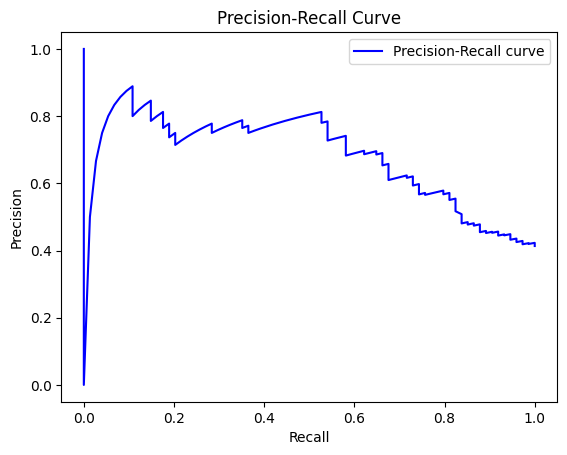

In [1570]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

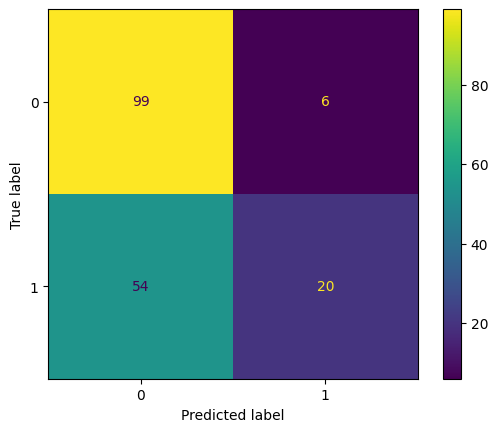

In [1571]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

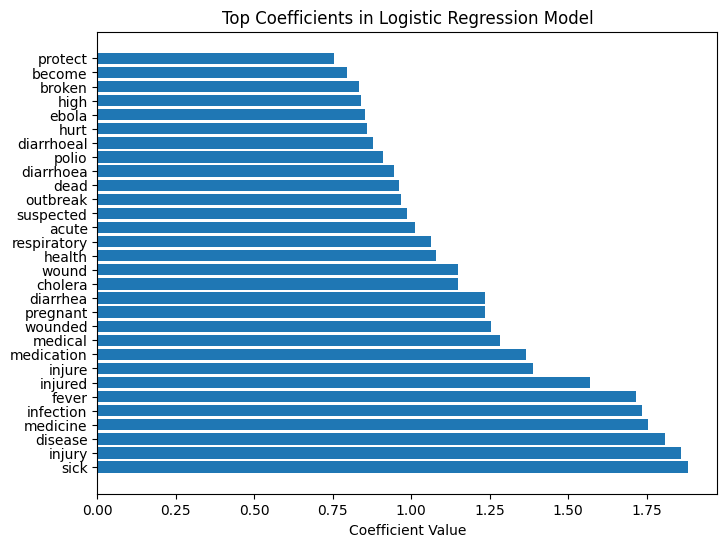

In [1572]:
import matplotlib.pyplot as plt

# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Obtain the coefficients of the logistic regression model
coefficients = lr_model.coef_[0]

# Sort the coefficients in descending order
sorted_coefficients = sorted(zip(coefficients, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_coefficients = sorted_coefficients[:k]
top_features = [feature for coef, feature in top_coefficients]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_coefficients])
ax.set_title("Top Coefficients in Logistic Regression Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [1573]:
top_coefficients

[(1.8810449936905598, 'sick'),
 (1.8606990078988614, 'injury'),
 (1.808808029197458, 'disease'),
 (1.7550793101852982, 'medicine'),
 (1.7356457089041493, 'infection'),
 (1.7146255309050658, 'fever'),
 (1.5681636000658803, 'injured'),
 (1.3891143744745973, 'injure'),
 (1.365766793293874, 'medication'),
 (1.2816942249445964, 'medical'),
 (1.2529564686082475, 'wounded'),
 (1.2355309115725122, 'pregnant'),
 (1.2348151555805602, 'diarrhea'),
 (1.1490935597867407, 'cholera'),
 (1.1481933582218793, 'wound'),
 (1.0781934137454936, 'health'),
 (1.063733617140772, 'respiratory'),
 (1.012288694731535, 'acute'),
 (0.9851320893662819, 'suspected'),
 (0.9689051521379226, 'outbreak'),
 (0.9610224267306758, 'dead'),
 (0.9453608469839139, 'diarrhoea'),
 (0.908714952606533, 'polio'),
 (0.8786769553701074, 'diarrhoeal'),
 (0.858623680880328, 'hurt'),
 (0.8535068737557702, 'ebola'),
 (0.840976144975804, 'high'),
 (0.8326806763044754, 'broken'),
 (0.7959561754170273, 'become'),
 (0.7544553617445188, 'prote

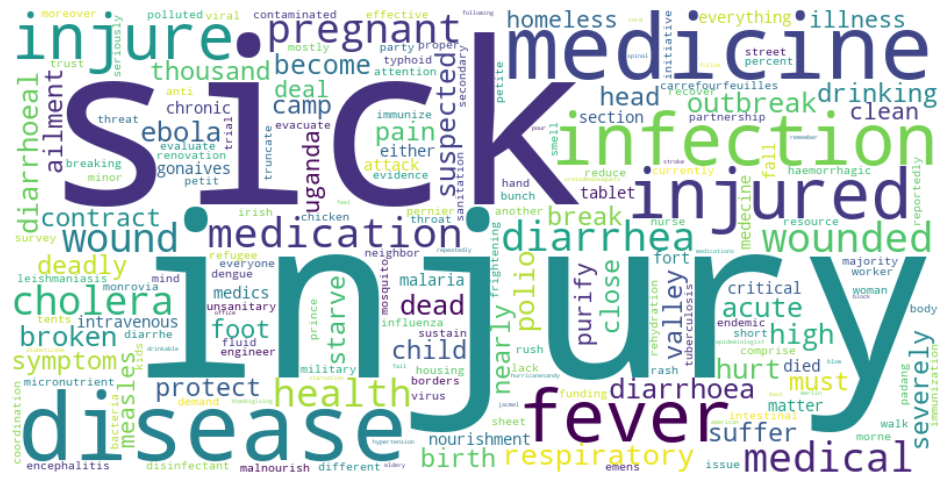

In [1574]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Combine the coefficients and feature names into a dictionary
word_scores = dict(zip(feature_names, coefficients))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_scores)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***3. Random Forest***

In [1575]:
from xgboost import XGBClassifier

In [1576]:
from sklearn.model_selection import train_test_split # package training and test data spilt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # package for random classifier
from sklearn.pipeline import make_pipeline # package for pipeline

In [1577]:
model = RandomForestClassifier() # assign random classifier (black box) as a prediction model
model.fit(X_train, y_train) # fit the training and test data into the prediction model

RandomForestClassifier()

In [1578]:
# Obtain the predictions for the validation data
rf_pred_val = model.predict(X_val)

In [1579]:

# convert '0' and '1' to 0 and 1
rf_pred_val = [int(label) for label in rf_pred_val]

In [1580]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice

results = classification_report(y_true=y_val, y_pred=rf_pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 70.95 %
Weighted Avg F1-score = 0.6841


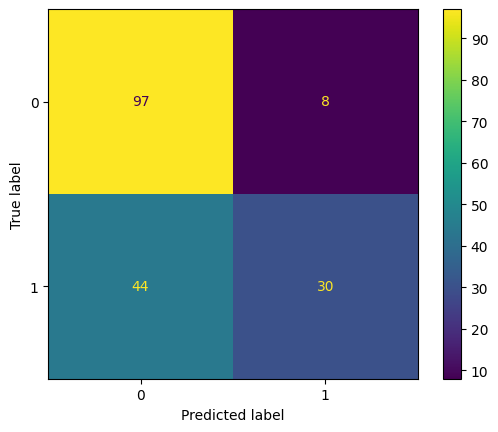

In [1581]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, rf_pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [1582]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


print(classification_report(y_val, rf_pred_val))


              precision    recall  f1-score   support

           0       0.69      0.92      0.79       105
           1       0.79      0.41      0.54        74

    accuracy                           0.71       179
   macro avg       0.74      0.66      0.66       179
weighted avg       0.73      0.71      0.68       179



In [1583]:
y_scores = model.predict_proba(X_val)[:, 1] # Probability of the positive class

In [1584]:
# convert '0' and '1' to 0 and 1
y_val = [int(label) for label in y_val]


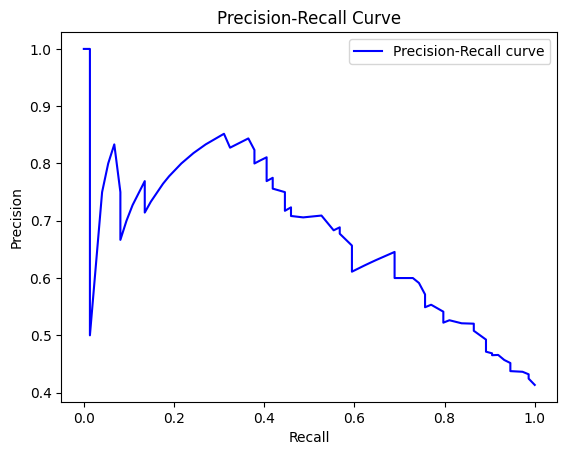

In [1585]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

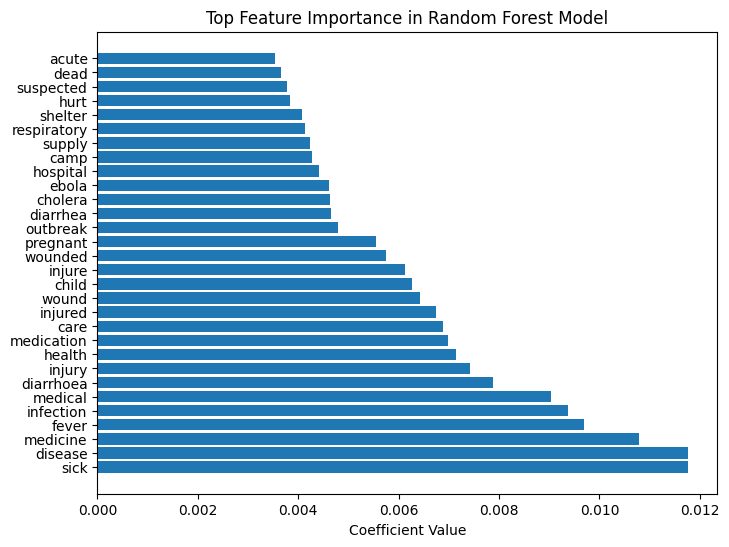

In [1586]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Random Forest Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [1587]:
top_importances

[(0.01176166904257834, 'sick'),
 (0.011756352982932676, 'disease'),
 (0.010784420219488899, 'medicine'),
 (0.009698179867128263, 'fever'),
 (0.009375918218758501, 'infection'),
 (0.009035427370562728, 'medical'),
 (0.007886322544137552, 'diarrhoea'),
 (0.007418830040474307, 'injury'),
 (0.007144683726346818, 'health'),
 (0.006975312787412329, 'medication'),
 (0.006888727531904053, 'care'),
 (0.0067364897043284315, 'injured'),
 (0.006423113069553112, 'wound'),
 (0.0062618352533828645, 'child'),
 (0.006136843781010899, 'injure'),
 (0.005754971559691632, 'wounded'),
 (0.0055413052275395175, 'pregnant'),
 (0.004801587219574228, 'outbreak'),
 (0.00464942590835442, 'diarrhea'),
 (0.004634082840581033, 'cholera'),
 (0.004613185339374762, 'ebola'),
 (0.004416082642066727, 'hospital'),
 (0.0042797717012064435, 'camp'),
 (0.004229684035239069, 'supply'),
 (0.004136237472426976, 'respiratory'),
 (0.004070917869758426, 'shelter'),
 (0.003828726779949972, 'hurt'),
 (0.003780045223262708, 'suspected

In [1588]:
words = [pair[1] for pair in top_importances]

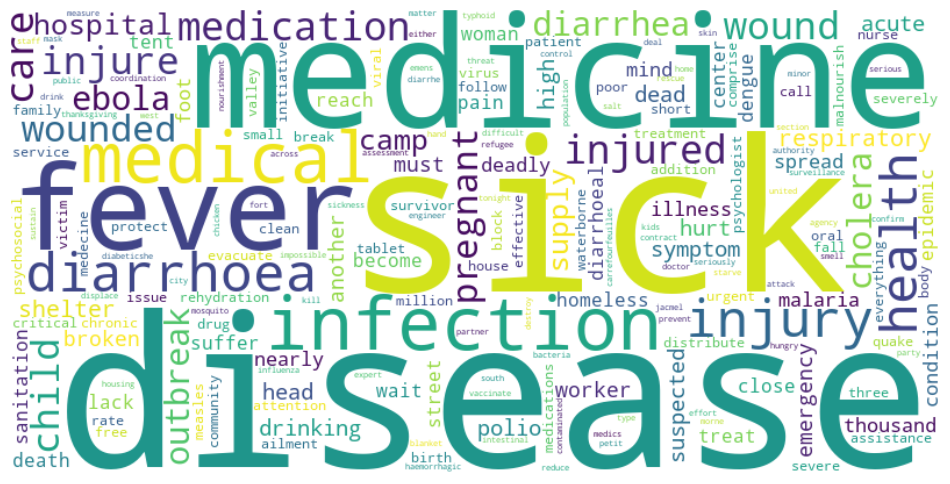

In [1589]:
# Generate feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the feature importance values you provided, we can see that "disease" and "medicine" are the two most important features for determining if the text relates to medical. Therefore, we can increase the weights of the terms "cancer" and "heart disease" to reflect their importance

***4. Decision Tree***

In [1590]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier # Decision Tree Model for Classification

In [1591]:
# Load the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = dt_model.predict(X_val)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
y_pred = [int(label) for label in pred_val]
results = classification_report(y_true=y_val, y_pred=y_pred, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 66.48 %
Weighted Avg F1-score = 0.6633


In [1592]:
pred_val=np.array([int(x) for x in pred_val])

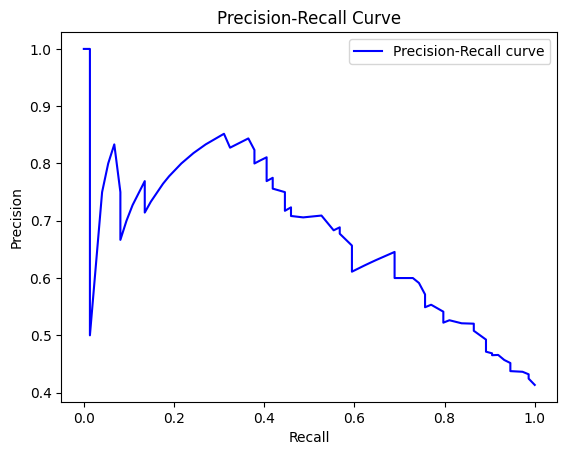

In [1593]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

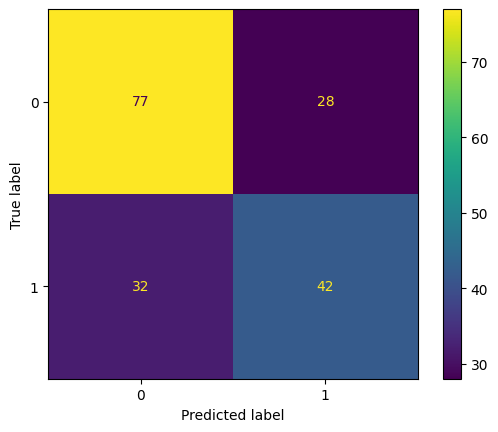

In [1594]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

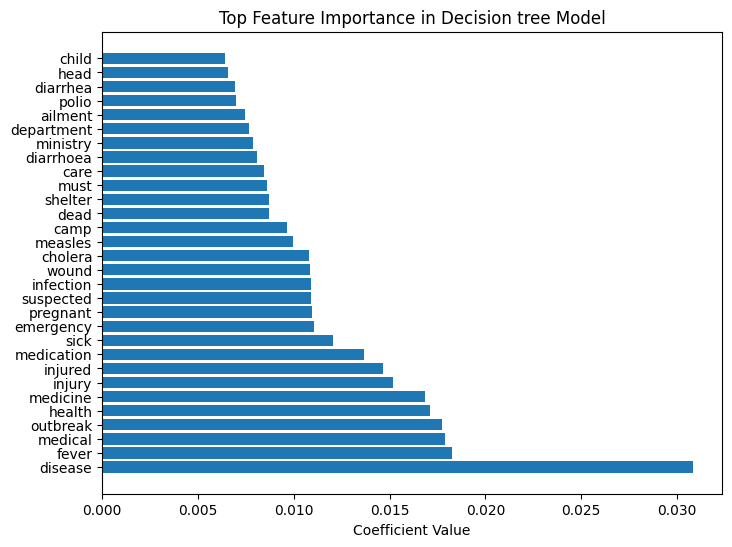

In [1595]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = dt_model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Decision tree Model")
ax.set_xlabel("Coefficient Value")
plt.show()

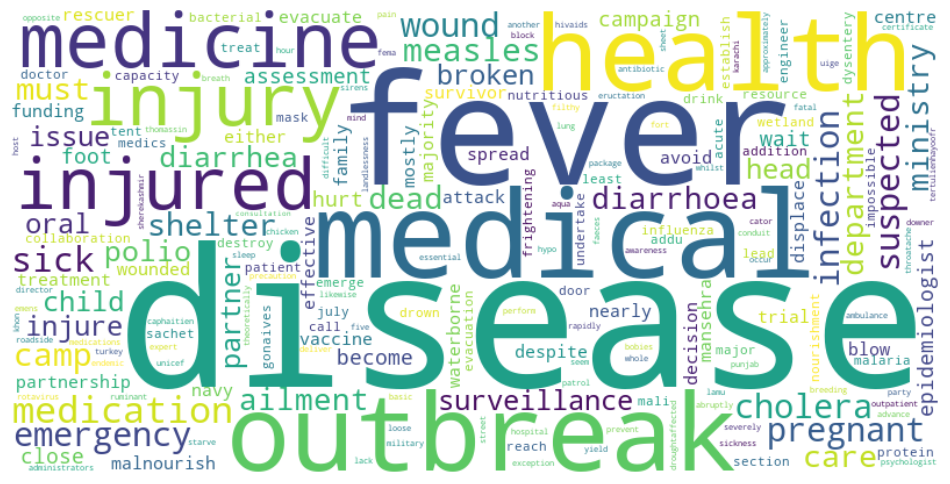

In [1596]:
# Generate feature importance plot
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***5. SVM***

In [1597]:
from sklearn.svm import SVC

In [1598]:
# Load the model
svc_model = SVC(C=0.5, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 59.22 %
Weighted Avg F1-score = 0.4557


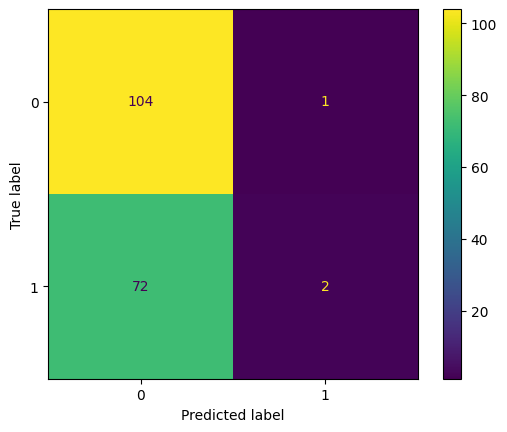

In [1599]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [1601]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importances
result = permutation_importance(svc_model, X_test, y_test, n_repeats=10, random_state=0)
importances = result.importances_mean

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Extract the top k feature importance and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Decision tree Model")
ax.set_xlabel("Coefficient Value")
plt.show()